In [6]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [7]:
books= pd.read_csv('BooksDataSet.csv')
books.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [8]:
books=books[['book_id', 'book_name', 'genre', 'summary']]
books.head(3)

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Crime Fiction'),
  Text(3, 0, 'Historical novel'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Thriller')])

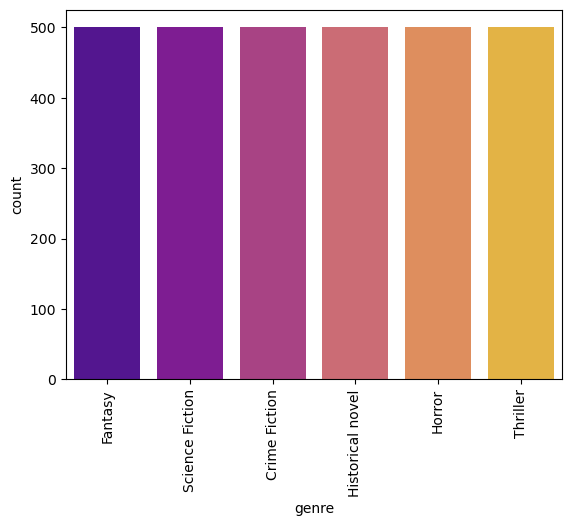

In [9]:
sn.countplot(x= books['genre'], palette='plasma')
plt.xticks(rotation= 'vertical')

In [10]:
books['summary'].iloc[1]

' As the book opens, Jason awakens on a school bus, unable to remember who or where he is, or anything about his past. He is sitting next to Piper McLean and Leo Valdez, who call him by name and say they are his girlfriend and best friend respectively. All three are part of a class field trip to the Grand Canyon, and after they arrive, a classmate Dylan turns into a Venti (Storm Spirit) and attacks the trio and their trip leader, Coach Gleeson Hedge. In the ensuing fight, Jason surprises everyone, including himself, when one of his coins turns into a sword which he uses to battle the storm spirits. Coach Hedge, who reveals himself to be a satyr during the fight, is taken captive by a fleeing spirit. After the battle, a flying chariot arrives to rescue the trio, but one of the people in it, Annabeth, is upset when she discovers that her missing boyfriend, Percy Jackson, is not there as she expected. Annabeth, seeking Percy, was told in a vision from the goddess Hera to look there for th

In [11]:
## Cleaning the text

def cleantext(text):

    text=re.sub(r'[^\w\s]', '', text)

    test =re.sub("[^a-zA-Z]"," ",text)

    text=' '.join(text.split())

    text=text.lower()

    return text

In [12]:
books['summary']=books['summary'].apply(lambda x:cleantext(x))
books['summary'].iloc[1]

'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

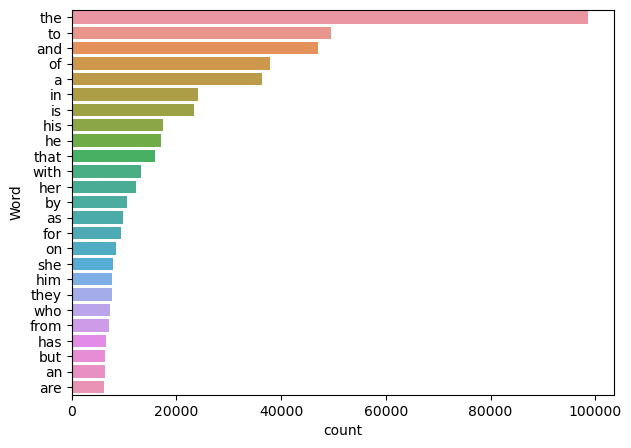

In [13]:
def showmostfrequentwords(text,no_of_words):
    
    allwords = ''.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)
    
    wordsdf = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    df = wordsdf.nlargest(columns="count",n = no_of_words)
    
    plt.figure(figsize=(7,5))
    ax = sn.barplot(data=df,x = 'count',y = 'word')
    ax.set(ylabel = 'Word')
    plt.show()
    
    return wordsdf
    
    
# 25 most frequent words

wordsdf = showmostfrequentwords(books['summary'],25)

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#Removing Stop Words

from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

#removing the stopwords

def removestopwords(text):

    removedstopword= [word for word in text.split(' ') if word not in stop_words]
    return ' '.join(removedstopword)

books['summary'] = books['summary'].apply(lambda x:removestopwords(x))
books['summary'].iloc[1]

'book opens jason awakens school bus unable remember anything past sitting next piper mclean leo valdez call name say girlfriend best friend respectively three part class field trip grand canyon arrive classmate dylan turns venti storm spirit attacks trio trip leader coach gleeson hedge ensuing fight jason surprises everyone including one coins turns sword uses battle storm spirits coach hedge reveals satyr fight taken captive fleeing spirit battle flying chariot arrives rescue trio one people annabeth upset discovers missing boyfriend percy jackson expected annabeth seeking percy told vision goddess hera look guy one shoe turns jason shoe destroyed fight jason piperand leo told demigods taken back camp halfblood meet greek demigod children like leo revealed son hephaestus piper daughter aphrodite jason son zeus though hera tells champion jason later discovers full brother zeuss demigod daughter thalia grace hunter artemis shortly arrive three given quest rescue hera captured set soon 

### LEMMATIZING

In [17]:
nltk.download('wordnet')
nltk.data.path.append("corpora")
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemsentence=""
    for word in sentence.split():
        stem=lemma.lemmatize(word)
        stemsentence +=stem
        stemsentence+= " "
    stemsentence=stemsentence.strip()
    return stemsentence

books['summary']=books['summary'].apply(lambda x:lematizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
books['summary'].iloc[1]

'book open jason awakens school bus unable remember anything past sitting next piper mclean leo valdez call name say girlfriend best friend respectively three part class field trip grand canyon arrive classmate dylan turn venti storm spirit attack trio trip leader coach gleeson hedge ensuing fight jason surprise everyone including one coin turn sword us battle storm spirit coach hedge reveals satyr fight taken captive fleeing spirit battle flying chariot arrives rescue trio one people annabeth upset discovers missing boyfriend percy jackson expected annabeth seeking percy told vision goddess hera look guy one shoe turn jason shoe destroyed fight jason piperand leo told demigod taken back camp halfblood meet greek demigod child like leo revealed son hephaestus piper daughter aphrodite jason son zeus though hera tell champion jason later discovers full brother zeus demigod daughter thalia grace hunter artemis shortly arrive three given quest rescue hera captured set soon discover enemy w

### Stemming

In [20]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

def stemming(sentence):
    stemmed=""
    for word in sentence.split():
        
        stem=stemmer.stem(word)
        stemmed+=stem
        stemmed+=" "
    stemmed= stemmed.strip()
    return stemmed

books['summary']=books['summary'].apply(lambda text:stemming(text))
books['summary'].iloc[1]
    

'book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword us battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piperand leo told demigod taken back camp halfblood meet greek demigod child like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thalia hunter look perci thal

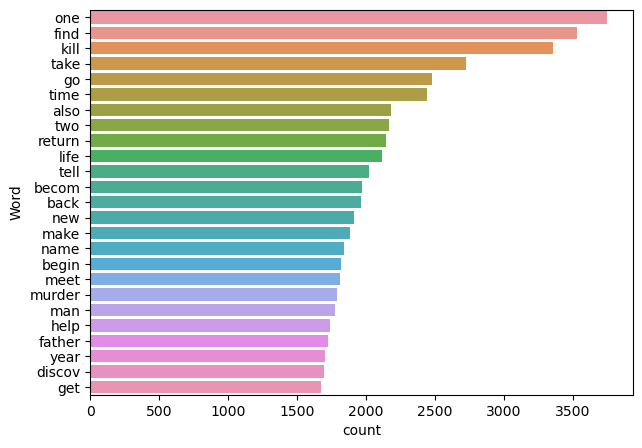

In [21]:
freq_df = showmostfrequentwords(books['summary'],25)

### Encoding

In [22]:
books_list=list(books['genre'].unique())

encode= [i for i in range(len(books_list))]
mapper=dict(zip(books_list,encode))
print(mapper)

{'Fantasy': 0, 'Science Fiction': 1, 'Crime Fiction': 2, 'Historical novel': 3, 'Horror': 4, 'Thriller': 5}


In [23]:
books['genre']=books['genre'].map(mapper)
books['genre'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

### MODEL BUILDING

In [24]:
count_vec=CountVectorizer(max_df=0.90,min_df=2,
                          max_features=1000,stop_words='english')

bagofword_vec= count_vec.fit_transform(books['summary'])
bagofword_vec

<3000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 241405 stored elements in Compressed Sparse Row format>

In [25]:
y= books['genre']

X_train,X_test,y_train,y_test= train_test_split(bagofword_vec,y,test_size=0.2)

### support vector classifier

In [26]:
svc=SVC()
svc.fit(X_train,y_train)
svc_pred= svc.predict(X_test)
print(metrics.accuracy_score(y_test,svc_pred))

0.5816666666666667


### Multinomial Naive Bayes

In [27]:
mb=MultinomialNB()
mb.fit(X_train,y_train)
mb_pred=mb.predict(X_test)
print(metrics.accuracy_score(y_test,mb_pred))

0.6883333333333334


### Random Forest Classifier

In [28]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred= rf.predict(X_test)
print(metrics.accuracy_score(y_test,rf_pred))

0.6366666666666667


### As Non of the above model is performing well, Changing CountVectorizer to TF-IDF

In [29]:
X_traintf,X_testtf,y_traintf,y_testtf =train_test_split(books['summary'],y,test_size=0.2,random_state=557)

In [30]:
tfidf= TfidfVectorizer(max_df=0.8,max_features=10000)
Xtrain_tfidf= tfidf.fit_transform(X_traintf.values.astype('U'))
Xtest_tfidf= tfidf.transform(X_testtf.values.astype('U'))

In [31]:
svc = SVC()
svc.fit(Xtrain_tfidf,y_traintf)
svccpred = svc.predict(Xtest_tfidf)
print(metrics.accuracy_score(y_testtf,svccpred))

0.7733333333333333


In [63]:
mb = MultinomialNB()
mb.fit(Xtrain_tfidf,y_train)
mbpred = mb.predict(Xtest_tfidf)
print(metrics.accuracy_score(y_test,mbpred))


0.145


### MODEL TESTING

In [38]:
def test(text, model):
    text = cleantext(text)
    text = removestopwords(text)
    text = lematizing(text)   # Assuming `lematizing` is defined elsewhere
    text = stemming(text)     # Assuming `stemming` is defined elsewhere

    text_vector = tfidf.transform([text])  # Use `tfidf` instead of `tfidf_vectorizer`
    predicted = model.predict(text_vector)
    return predicted

# Applying the function
ans = books['summary'].apply(lambda text: test(text, mb))


In [39]:
ans

0        [Fantasy]
1        [Fantasy]
2        [Fantasy]
3        [Fantasy]
4        [Fantasy]
           ...    
2995     [Fantasy]
2996     [Fantasy]
2997    [Thriller]
2998    [Thriller]
2999    [Thriller]
Name: summary, Length: 3000, dtype: object

In [49]:
ans[i][0]

'Fantasy'

In [53]:
predicted=[]

for i in range(len(ans)):

    idx_val= ans[i][0]
    # print([list(mapper.values()).index(idx_val)])
    predicted.append(list(mapper.keys())[list(mapper.keys()).index(idx_val)])

In [43]:
new_map= dict([(value,key) for key,value in mapper.items()])
books['Actual Genre']=books['genre'].map(new_map)

In [56]:
books['Predicted']=np.array(predicted)

In [57]:
books=books[['book_name','summary', 'Actual Genre','Predicted']]

In [65]:
books.head(1)

,book_name,summary,Actual Genre,Predicted
0,Drowned Wednesday,wsssswswssswsssswssswssssswssssswssswsswwswsss...,NaN,Fantasy


In [59]:
import pickle
file= open("bookgenremodel.pkl",'wb')
pickle.dump(mb,file)
file.close()

In [60]:
file= open('tfidf.pkl','wb')
pickle.dump(tfidf,file)
file.close()